In [115]:
#Getting required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [60]:
#Read the data
df = pd.read_csv(r'C:\Users\chima\Desktop\tp\prasad\Data Analytics\dashboards\countries of the world.csv')

In [61]:
df.describe(include = 'all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dominican Republic,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


In [62]:
#Null values count
df.isnull().sum(axis = 0)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [63]:
df[df.isnull().any(axis=1)]
#48 rows out of 227 has some sort of NA values in it
#Following are the records

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


There are two ways we can fix this NA value problem
1. Easy way out is to put median/mean of the respective column in place of NA value, this will not be very practical thing to do and reality may be very different.
2. Train a model based on the remaining available data and predict the NA values, this is a longer approach

Take away :- For this exercise, let's stick to simple approach like the 1st one.

In [64]:
column_means = df.mean()
df2 = df.fillna(column_means)

In [65]:
#Fixig the NA values with column means
print(df.isnull().sum(axis = 0))
print('*'*100)
print(df2.isnull().sum(axis = 0))

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64
****************************************************************************************************
Country                               0
Region                    

In [66]:
df2.Region = df2.Region.str.strip() #Remove the trailing spaces of the Regions

In [67]:
df2.drop(columns = ["Country"], inplace = True) #Dropping country column as it has all distinct values

In [68]:
#One hot encoding for Region Column, as regression is not good with string data
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2['Region'])
# Drop column B as it is now encoded
df3 = df2.drop('Region',axis = 1)
# Join the encoded df
df3 = df3.join(one_hot)
df3  

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,...,0,0,0,0,0,0,0,0,1,0


In [69]:
df3.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'ASIA (EX. NEAR EAST)', 'BALTICS',
       'C.W. OF IND. STATES', 'EASTERN EUROPE', 'LATIN AMER. & CARIB',
       'NEAR EAST', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
       'SUB-SAHARAN AFRICA', 'WESTERN EUROPE'],
      dtype='object')

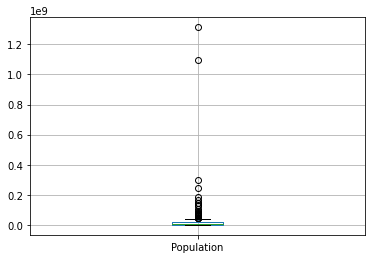

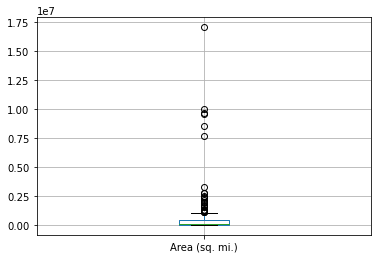

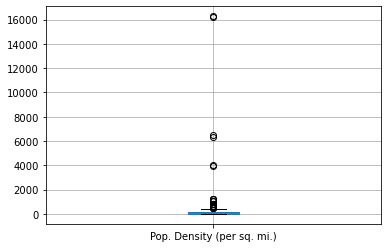

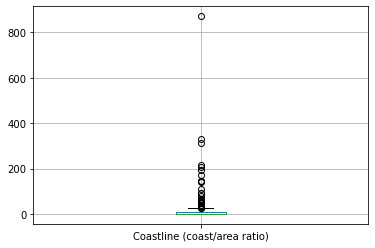

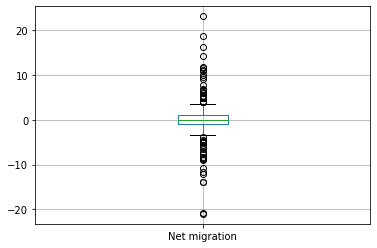

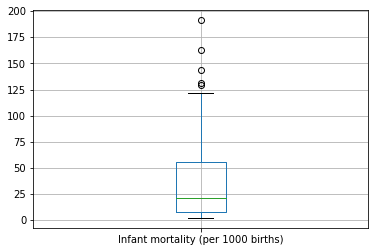

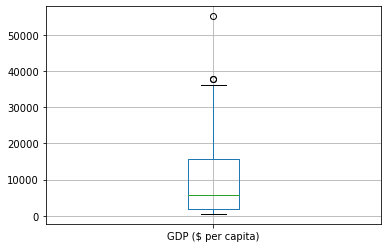

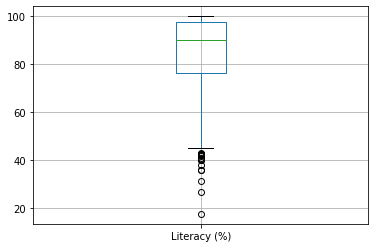

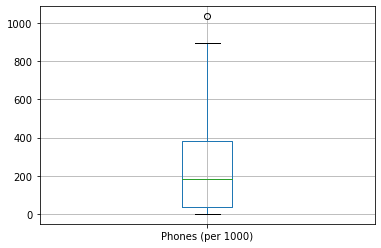

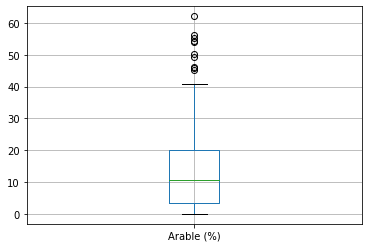

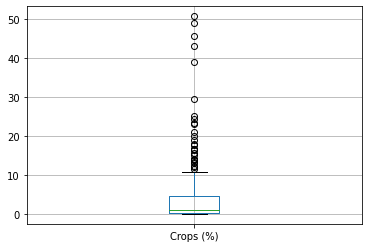

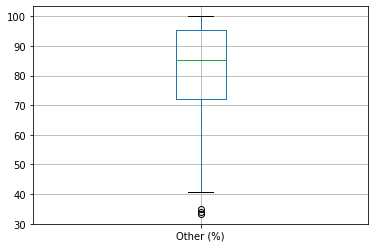

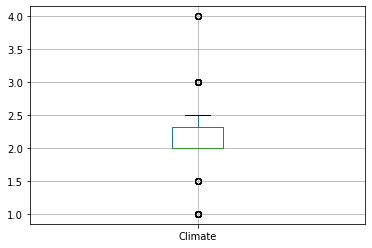

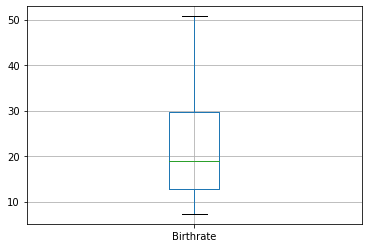

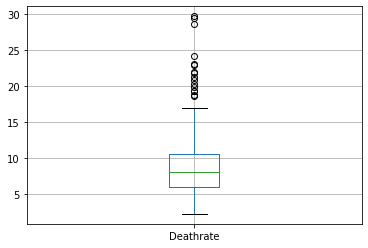

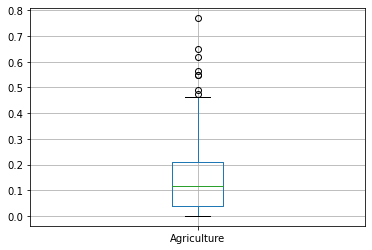

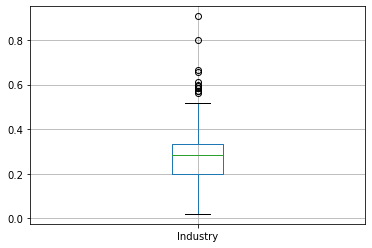

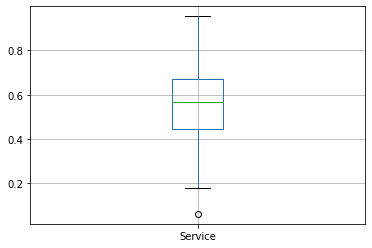

In [70]:
# Visualize Some Data
col_list = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service']
for each in col_list:
    plt.figure()
    df3.boxplot([each])

Observations :- Fields like Area, Population, Coastline and Crops are heavily skewed. These variables also have outliers, but they are valid data points, cannot remove them. Hence no point in applying linear regression and trying to quantify relationships. I will be using Decision Tree, RF and XGboost algorithms.

In [83]:
Predictors = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'ASIA (EX. NEAR EAST)', 'BALTICS',
       'C.W. OF IND. STATES', 'EASTERN EUROPE', 'LATIN AMER. & CARIB',
       'NEAR EAST', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
       'SUB-SAHARAN AFRICA', 'WESTERN EUROPE']
target = ['Infant mortality (per 1000 births)']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df3[Predictors], df3[target],test_size=0.2)

In [84]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

In [113]:
compare = y_test
compare['pred'] = y_pred
compare.rename(columns= {'Infant mortality (per 1000 births)':'actual'}, inplace = True)

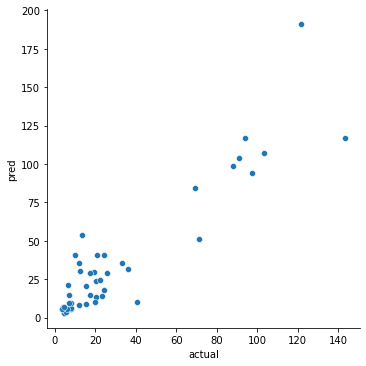

In [117]:
sns.relplot(x="actual", y="pred", data=compare)